### Darlene Phan
August 11, 2022<br>
Project 2

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
df.shape

(7500, 11)

NV stands for non vintage, which means that they are blends of multiple years. This does affect the price and possible rating of the wine. Since this doesn't fall in line with the other int in this column its best to drop so we don't have mixed data or create a bias<br>
<br>
Renaming year to vintage due to its bias. People associate year with price. 

In [4]:
#Changing categorical values of N.V. to nan. 
df['year'] = df['year'].replace('N.V.', np.NaN)

In [5]:
#Changing year to vintage
dictionary = {'year': 'vintage'}
df = df.rename(columns=dictionary)

In [6]:
df.vintage.unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       nan, '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', '2006', '2000', '2003', '2002',
       '1991', '1994', '1990', '1989', '1987', '1986', '1981', '2001',
       '1968', '1964', '1982', '1974', '1983', '1955', '1980', '1972',
       '1953', '1958', '1942', '1965', '1992', '1973', '1997', '1967',
       '1975', '1910', '1961', '1954', '1988', '1969', '1951', '1928',
       '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [7]:
#checking and dropping duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
#checking for null/missing values
df.isnull().sum()

winery           0
wine             0
vintage         72
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

Dropping missing values in vintage as discussed earlier. Dropping type, because that's not something should be imputed since it greatly impacts the possible rating of the wine.

'body' and 'acidity' will be handled differently

In [9]:
#Dropping missing values
df.dropna(subset=['type','vintage'], inplace=True)

In [10]:
#confirming 'type' and 'vintage' columns have been dropped
df.isnull().sum()

winery           0
wine             0
vintage          0
rating           0
num_reviews      0
country          0
region           0
price            0
type             0
body           163
acidity        163
dtype: int64

In [11]:
#Correcting object type after dropping duplicates
df['vintage'] = df['vintage'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1877 non-null   object 
 1   wine         1877 non-null   object 
 2   vintage      1877 non-null   int64  
 3   rating       1877 non-null   float64
 4   num_reviews  1877 non-null   int64  
 5   country      1877 non-null   object 
 6   region       1877 non-null   object 
 7   price        1877 non-null   float64
 8   type         1877 non-null   object 
 9   body         1714 non-null   float64
 10  acidity      1714 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 176.0+ KB


In [14]:
df.describe()

,vintage,rating,num_reviews,price,body,acidity
count,1877.000000,1877.000000,1877.000000,1877.000000,1714.000000,1714.000000
mean,2010.869473,4.404688,579.998934,142.612586,4.263127,2.928238
std,11.300344,0.148552,1181.990378,282.560181,0.660949,0.313328
min,1910.000000,4.200000,25.000000,6.260000,2.000000,1.000000
25%,2010.000000,4.300000,60.000000,32.550000,4.000000,3.000000
50%,2015.000000,4.400000,151.000000,55.140000,4.000000,3.000000
75%,2017.000000,4.500000,513.000000,117.300000,5.000000,3.000000
max,2021.000000,4.900000,16505.000000,3119.080000,5.000000,3.000000


In [15]:
#copy for machine learning
df_ml = df.copy()

Imputing mean for viz. Using this method because it makes more sense to fill it with an average to not skew the current data.

In [16]:
#imputing
df['body'] = df['body'].fillna(round(df['body'].mean()))
df['acidity'] = df['acidity'].fillna(round(df['acidity'].mean()))

In [17]:
df.isnull().sum()

winery         0
wine           0
vintage        0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

## Exploratory Data Viz
Univariate visuals for the target and all features

In [18]:
#Total unique counts of each column
print(df.apply(lambda col: col.nunique()))

winery          410
wine            706
vintage          70
rating            8
num_reviews     793
country           1
region           65
price          1210
type             21
body              4
acidity           3
dtype: int64


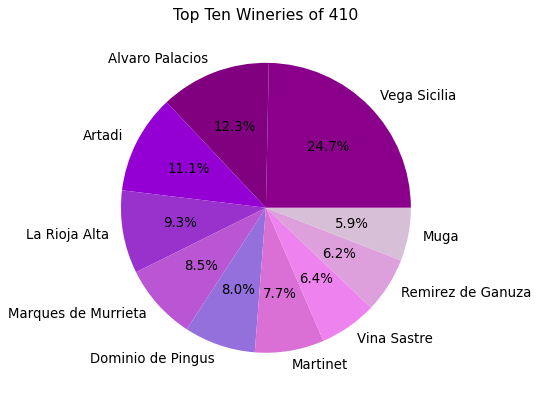

In [19]:
#Visualizing the top 10 Wineries
plt.figure(figsize=(8, 6), dpi=80)
c=['darkmagenta', 'purple', 'darkviolet', 'darkorchid', 'mediumorchid','mediumpurple', 'orchid', 'violet', 'plum', 'thistle']
df.winery.value_counts().sort_values(ascending=False).head(10).plot(kind='pie', 
                                                                    autopct='%1.1f%%', 
                                                                    colors=c,
                                                                    fontsize=12)
plt.ylabel('')
plt.title('Top Ten Wineries of 410', fontsize=14)
plt.show()

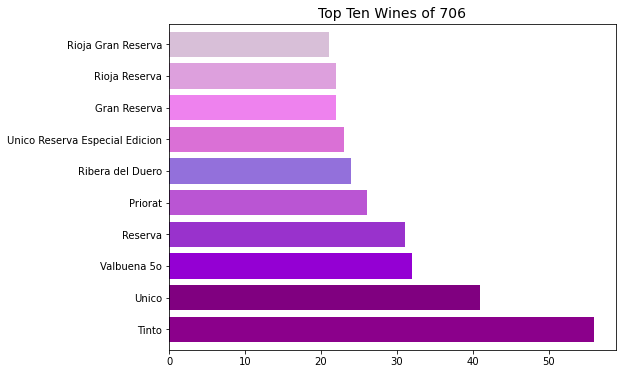

In [20]:
#top ten wines viz
plt.figure(figsize=(8, 6))
df.wine.value_counts(ascending=False).head(10).plot(kind='barh', width=.8, color=c)
plt.ylabel('')
plt.title('Top Ten Wines of 706', fontsize=14)
plt.show()

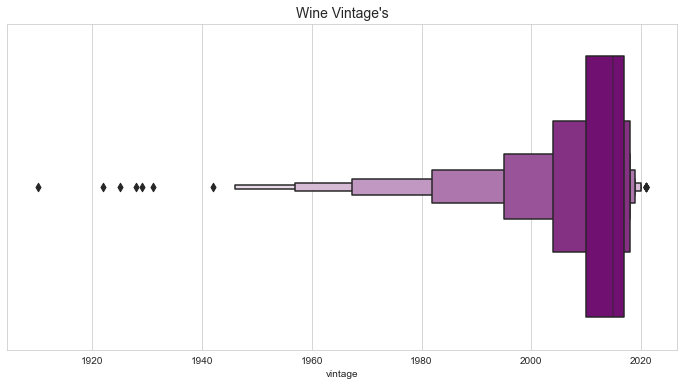

In [21]:
#Wine vintages outliers boxenplot
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.boxenplot(data=df, x='vintage', color='purple')
plt.title("Wine Vintage's", fontsize=14)
plt.show()

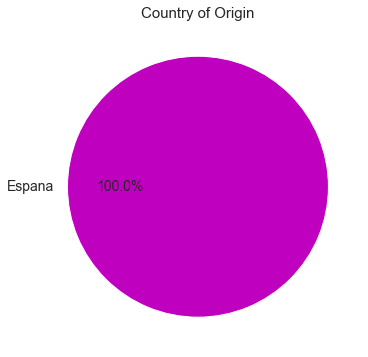

In [22]:
#lol, I'll be deleting this row. This was for my own amusement. 
#HOWEVER, 100% of the wines come from Spain. 
plt.figure(figsize=(8, 6))
df.country.value_counts().plot(kind='pie', autopct='%1.1f%%', fontsize=14, colors='m')
plt.ylabel(' ')
plt.title('Country of Origin', fontsize=15)
plt.show()

Interesting, turns out that the top regions for wine are taken up by 3 areas. 

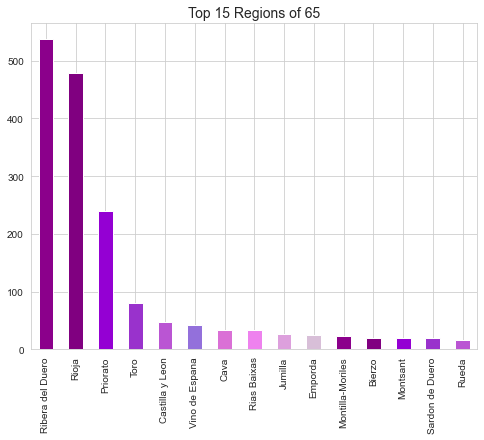

In [23]:
#Reigions bar plot
plt.figure(figsize=(8, 6))
df.region.value_counts().head(15).plot(kind='bar', color=c)
plt.title('Top 15 Regions of 65', fontsize=14)
plt.show()

A deeper dive shows us that the lower 50% has less that 5 wines per reigon. Which means the top 3 are majority outliers. Curious as to how many unique wineries are in these locations and how many of them are mass produced.

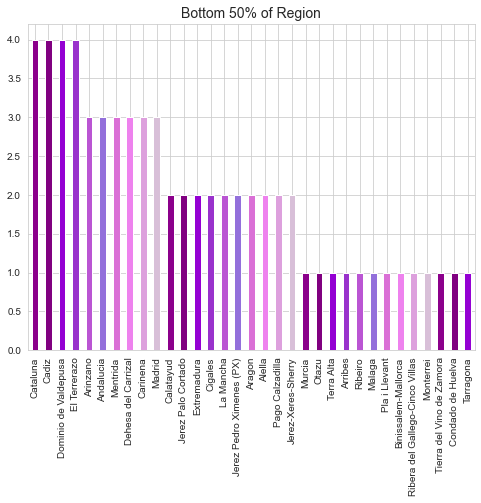

In [24]:
#bottom 50% bar plot
plt.figure(figsize=(8, 6))
df.region.value_counts().tail(33).plot(kind='bar', color=c)
plt.title('Bottom 50% of Region', fontsize=14)
plt.show()

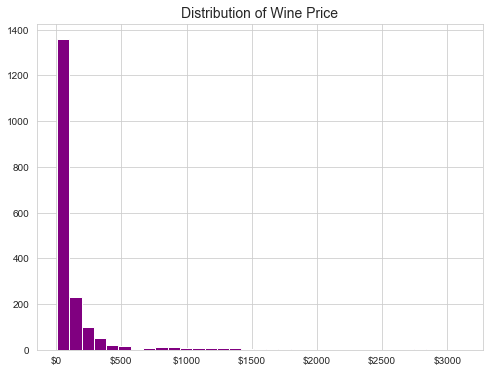

In [25]:
#Wine price distribution
fig, ax = plt.subplots(figsize=(8, 6))
n_bins = 33
ax.hist(df['price'], 
        n_bins, 
        color='purple',
        histtype ='bar')
plt.title('Distribution of Wine Price', fontsize=14)
ax.xaxis.set_major_formatter('${x:1.0f}')
plt.show()

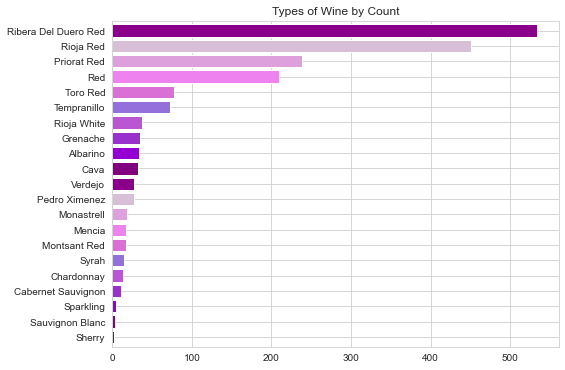

In [26]:
plt.figure(figsize=(8, 6))
df.type.value_counts().sort_values(ascending=True).plot(kind='barh', width=.8, color=c)
plt.title('Types of Wine by Count')
plt.show()

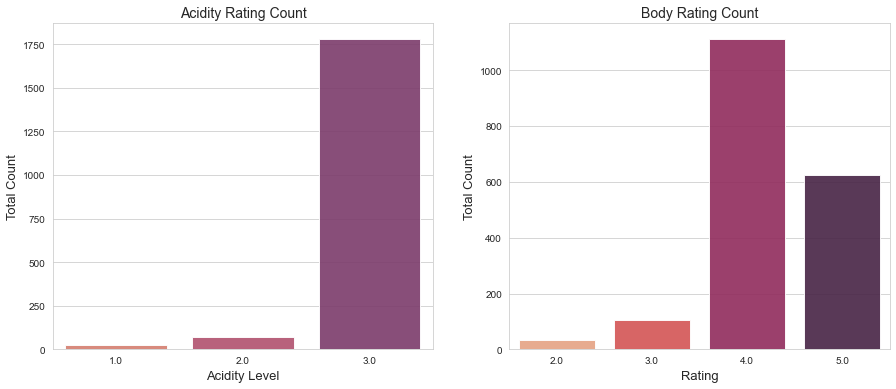

In [27]:
large = 14
plt.rc('axes', labelsize=large)
f, axes = plt.subplots(1,2, figsize=(15,6))

ax1=sns.countplot(data=df, x="acidity", ax=axes[0],  palette='flare', alpha=.9)
axes[0].set_title('Acidity Rating Count', fontsize=14)
axes[0].set_xlabel('Acidity Level', fontsize=13)
axes[0].set_ylabel('Total Count', fontsize=13)

sns.countplot(data=df, x="body", ax=axes[1], palette='rocket_r', alpha=.9)
axes[1].set_title('Body Rating Count', fontsize=14)
axes[1].set_xlabel('Rating', fontsize=13)
axes[1].set_ylabel('Total Count', fontsize=13)

plt.show()

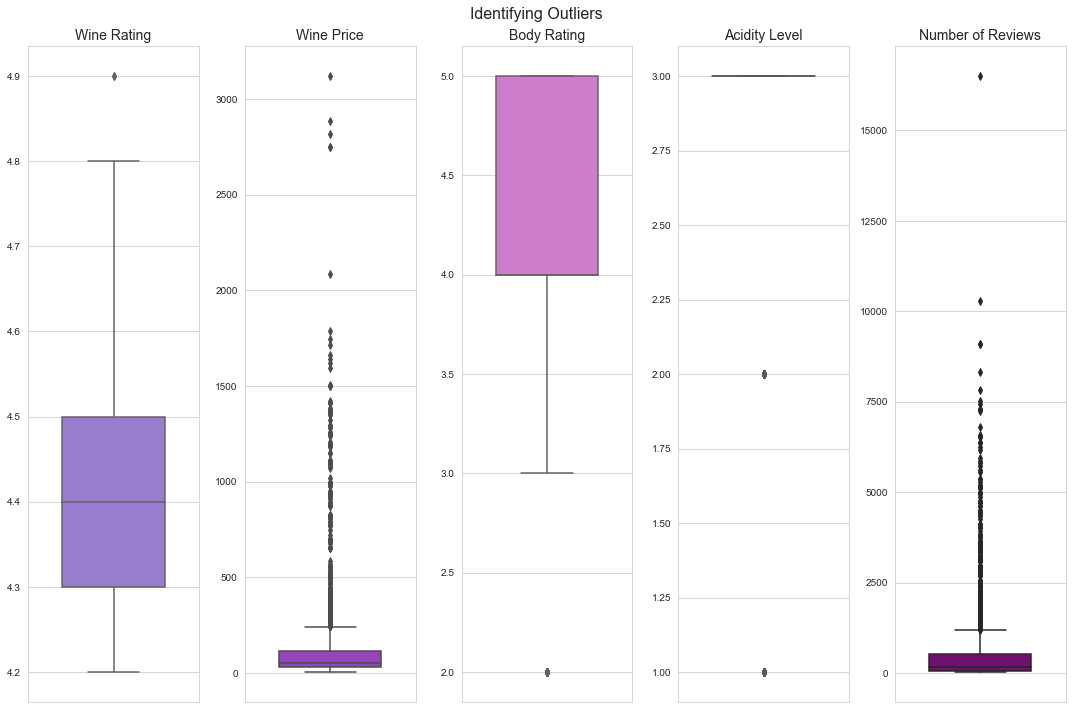

In [28]:
large = 14
plt.rc('axes', labelsize=large)
f, axes = plt.subplots(1,5, figsize=(15,10))

ax1=sns.boxplot(y='rating', data=df, ax=axes[0], color='mediumpurple', width=.6)
axes[0].set_title('Wine Rating', fontsize=large)
plt.ylabel('')
sns.boxplot(y='price', data=df, ax=axes[1], color='darkorchid', width=.6)
axes[1].set_title('Wine Price', fontsize=large)

sns.boxplot(y='body', data=df, ax=axes[2], color='orchid', width=.6)
axes[2].set_title('Body Rating', fontsize=large)

sns.boxplot(y='acidity', data=df, ax=axes[3], color='mediumorchid', width=.6)
axes[3].set_title('Acidity Level', fontsize=large)

sns.boxplot(y='num_reviews', data=df, ax=axes[4], color='purple', width=.6)
axes[4].set_title('Number of Reviews', fontsize=large)

plt.suptitle('Identifying Outliers', fontsize=16)

#hide y axis label
for ax in axes.flat:
    ax.set(xlabel='', ylabel='')
plt.tight_layout()
plt.show()

## The Target (Univariate and Multivariate)

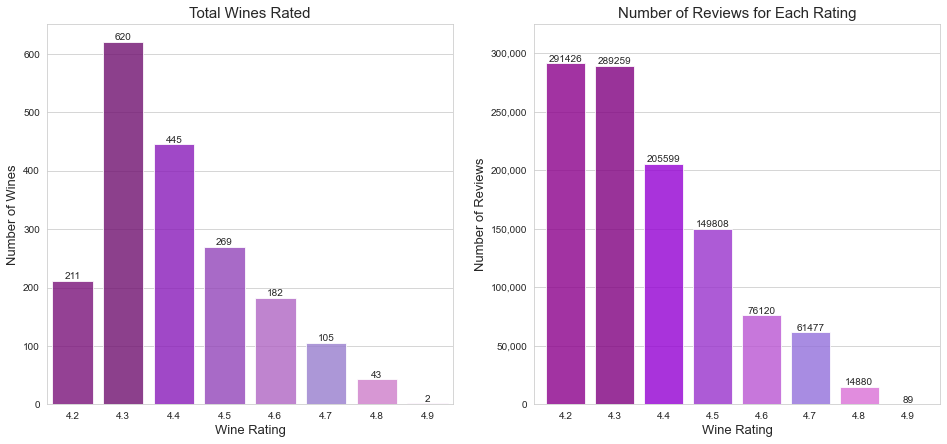

In [29]:
#Distribution of wine rating. 
color = ['darkmagenta', 'purple', 'darkviolet', 'darkorchid', 'mediumorchid','mediumpurple', 'orchid', 'violet', 'plum', 'thistle']
plt.rc('axes')
f, axes = plt.subplots(1,2, figsize=(16,7))

#Left Plot
ax1=sns.countplot(data=df, x="rating", ax=axes[0],  
                  palette=['darkmagenta', 'purple', 'darkviolet', 'darkorchid', 'mediumorchid','mediumpurple', 'orchid', 'violet', 'plum', 'thistle'], 
                  alpha=.8)
#title
ax1.set_title('Total Wines Rated', fontsize=15)
#x,y labels/formats
ax1.bar_label(ax1.containers[0]) #bar labels
ax1.set_xlabel('Wine Rating', fontsize=13)
ax1.set_ylabel('Number of Wines', fontsize=13)


#Right Plot
ax2=df.groupby('rating')['num_reviews'].sum().plot(kind='bar', 
                                                   color=color, width=.8, alpha=.8)
ax2.grid(axis='x')

#title
ax2.set_title('Number of Reviews for Each Rating', fontsize=15)
#x,y labels/formats
plt.xticks(rotation=0)
ax2.bar_label(ax2.containers[0]) #bar labels
ax2.set_xlabel('Wine Rating', fontsize=13)
ax2.set_ylabel('Number of Reviews', fontsize=13)

ax2.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylim([0,325000])
plt.show()

I have 15+ years of hospitality experience, and was able to correlate what I already knew about Spanish wines to these visuals. It was not surprising to find out that majority of Spanish wines have higher acidity levels(great for cutting through fatty foods), medium-full body (will hold up against food) and natrually very good mean rating between 4.3 - 4.7. 

Most wines are enjoyed with food. Since Spanish wines have characteristics that allow them to stand up to food and not be washed out, it's understandable why the majority of these ratings are as high as they are. I always knew, Spanish wines were great with food, I never realized that the majority of them had similar characteristics regardless of types or reigons. Situations like this is where my domain expertise will shine.

Based on my background and visualizations, there are a couple different ways we could approach wine ratings. Since there are so many wine types, regions, on top of dropped rows that had missing wine types, there is always room for us to go back and create a more specific ML learning model. One that could be more focused on the regions of Spain or the types of wines. But for now, we will work on a ML model for the wines as a whole

## Multivariate EDA 

#### Identifying moderate or strong correlations

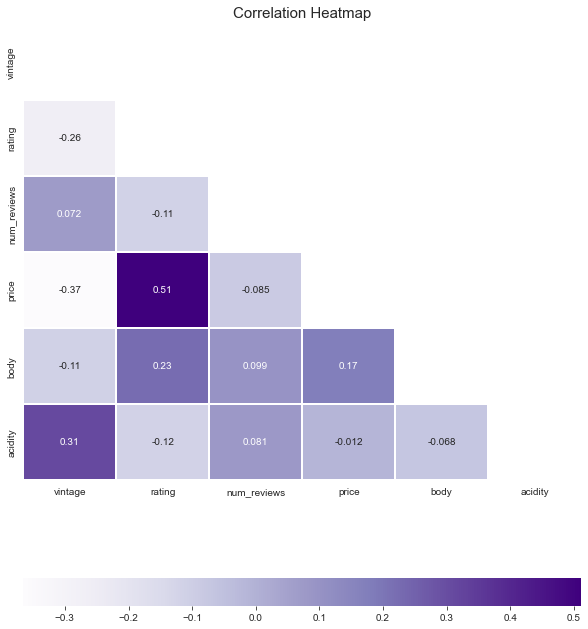

Larger positive correlation between rating/price and vintage/acidity



In [30]:
#Correlation Plot
plt.figure(figsize=(10,12))
corr = df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, cmap='Purples', mask=matrix, linecolor='white', linewidths=2, cbar_kws={"orientation": "horizontal"})
plt.title('Correlation Heatmap', fontsize=15)
plt.show()
print('Larger positive correlation between rating/price and vintage/acidity\n')

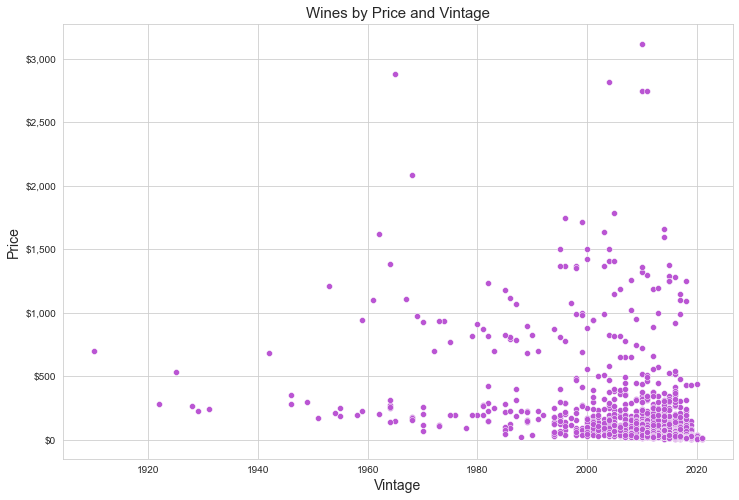

Older vintages have no effect on price



In [31]:
#scatterplot
fig, ax = plt.subplots(figsize=(12,8))
#plot
ax = sns.scatterplot(data=df, y='price', x='vintage', color='mediumorchid')
plt.title('Wines by Price and Vintage', fontsize=15)
#x,y formats/labels
ax.yaxis.set_major_formatter('${x:1,.0f}')
plt.ylabel('Price')
plt.xlabel('Vintage')

plt.show()
print('Older vintages have no effect on price\n')

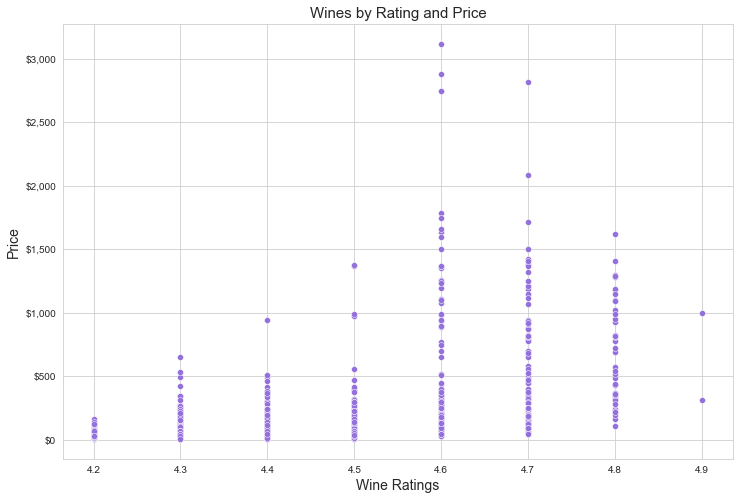

Higher rating wines have a larger distribution in pricing when above 4.5. However, dips at 4.8 rating.



In [32]:
#scatterplot
fig, ax = plt.subplots(figsize=(12,8))
#plot
ax = sns.scatterplot(data=df, y='price', x='rating', color='mediumpurple')
plt.title('Wines by Rating and Price', fontsize=15)

#x,y formats/labels
ax.yaxis.set_major_formatter('${x:1,.0f}')
plt.ylabel('Price')
plt.xlabel('Wine Ratings')

plt.show()
print('Higher rating wines have a larger distribution in pricing when above 4.5. However, dips at 4.8 rating.\n')

# Part 4

In [35]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
set_config(display='diagram')

### Data cleaning

In [36]:
#drop country 
df_ml.drop(columns='country', inplace=True)
df_ml.head()

,winery,wine,vintage,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [37]:
#checking missing values
df_ml.isnull().sum()

winery           0
wine             0
vintage          0
rating           0
num_reviews      0
region           0
price            0
type             0
body           163
acidity        163
dtype: int64

In [38]:
#drop missing values
df_ml.dropna(subset=['body', 'acidity'], inplace=True)

### Eval Metrics Function

In [39]:
def eval_regression(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    return [rmse, r2]

## Preprocessing

In [40]:
#DF copy
df1 = df_ml.copy()

In [41]:
df1.head()

,winery,wine,vintage,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [42]:
#Features and Target
X = df1.drop(columns='rating')
y = df1['rating']
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

In [43]:
#Column Selector
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [44]:
#OHE
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
#scaler
scaler = StandardScaler()

## Method 1 - Decision Tree

### Decision Tree Model - Default Model

In [45]:
#Pipelines for Decision Tree
dec_cat_pipe = make_pipeline(ohe)
dec_num_pipe = make_pipeline(scaler)

In [46]:
#Tuples
dec_num_tuple = (dec_num_pipe, num_selector)
dec_cat_tuple = (dec_cat_pipe, cat_selector)

In [47]:
dec_preprocessor = make_column_transformer(dec_num_tuple, dec_cat_tuple, remainder='passthrough')
dec_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>)])

In [48]:
#Instantiate Decision Tree Model
dec_tree = DecisionTreeRegressor(random_state=42)

#Dec Tree Pipe
dec_tree_pipe = make_pipeline(dec_preprocessor, dec_tree)

In [49]:
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [50]:
%%time
#Predictions 
dec_train_score = eval_regression(y_train, dec_tree_pipe.predict(X_train))
dec_test_score = eval_regression(y_test, dec_tree_pipe.predict(X_test))
print('Regression Tree Training Results')
print(f'RMSE Score: {dec_train_score[0]}')
print(f'R^2 Score: {dec_train_score[1]}\n')

print('Regression Tree Testing Results')
print(f'RMSE Score:  {dec_test_score[0]}')
print(f'R^2 Score: {dec_test_score[1]}\n')

Regression Tree Training Results
RMSE Score: 2.3110443468466103e-16
R^2 Score: 1.0

Regression Tree Testing Results
RMSE Score:  0.12746405864825677
R^2 Score: 0.27443753154482264

CPU times: user 23 ms, sys: 5.67 ms, total: 28.7 ms
Wall time: 27.1 ms


In [51]:
#Keeping track of scores
df_index = ['Reg Train', 'Reg Test']
scores_df = pd.DataFrame(index=df_index, columns=['RMSE', 'R^2'])
#default reg tree
scores_df.loc['Reg Train'] = [dec_train_score[0], dec_train_score[1]]
scores_df.loc['Reg Test'] = [dec_test_score[0], dec_test_score[1]]
scores_df

,RMSE,R^2
Reg Train,0.0,1.0
Reg Test,0.127464,0.274438


### Decision Tree Model - with PCA 

In [52]:
#Instantiate PCA
pca = PCA(n_components=.95)

In [53]:
#PCA Dec Tree Pipe
pca_dec_tree_pipe = make_pipeline(dec_preprocessor, pca, dec_tree)

In [54]:
pca_dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>)])),
                ('pca', PCA(n_components=0.95)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [55]:
%%time
#Predictions 
pca_dec_train_score = eval_regression(y_train, pca_dec_tree_pipe.predict(X_train))
pca_dec_test_score = eval_regression(y_test, pca_dec_tree_pipe.predict(X_test))
print('Regression Tree Training Results')
print(f'RMSE Score: {pca_dec_train_score[0]}')
print(f'R^2 Score: {pca_dec_train_score[1]}\n')

print('Regression Tree Testing Results')
print(f'RMSE Score:  {pca_dec_test_score[0]}')
print(f'R^2 Score: {pca_dec_test_score[1]}\n')

Regression Tree Training Results
RMSE Score: 3.909744042096702e-16
R^2 Score: 1.0

Regression Tree Testing Results
RMSE Score:  0.12223634869270655
R^2 Score: 0.33273236401754835

CPU times: user 120 ms, sys: 11.2 ms, total: 131 ms
Wall time: 46.2 ms


In [56]:
#Keeping track of scores
scores_df.loc['Reg PCA Train'] = [pca_dec_train_score[0], pca_dec_train_score[1]]
scores_df.loc['Reg PCA Test'] = [pca_dec_test_score[0], pca_dec_test_score[1]]
scores_df

,RMSE,R^2
Reg Train,0.0,1.0
Reg Test,0.127464,0.274438
Reg PCA Train,0.0,1.0
Reg PCA Test,0.122236,0.332732


## Decision Tree w/Hyperparams
on model with better metrics. 

In [57]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [58]:
print(dec_tree.get_depth())
print(dec_tree.get_n_leaves())

26
520


In [59]:
depths = list(range(2,30))
scores = pd.DataFrame(index=depths, columns=['Train Score', 'Test Score'])

for d in depths:
    model_dec_tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    model_dec_pipe = make_pipeline(dec_preprocessor, pca, model_dec_tree)
    model_dec_pipe.fit(X_train, y_train)
    train_score = model_dec_pipe.score(X_train, y_train)
    test_score = model_dec_pipe.score(X_test, y_test)
    scores.loc[d, 'Train Score'] = train_score
    scores.loc[d, 'Test Score'] = test_score

In [60]:
#Checking new scores
scores.head()

,Train Score,Test Score
2,0.299953,0.306379
3,0.391124,0.361274
4,0.491688,0.419715
5,0.59796,0.37159
6,0.690687,0.378325


In [61]:
#Sort results by highest Test Score
sorted_scores = scores.sort_values('Test Score', ascending=False)
sorted_scores.head()

,Train Score,Test Score
4,0.491688,0.419715
6,0.690687,0.378325
5,0.59796,0.37159
3,0.391124,0.361274
8,0.847076,0.35816


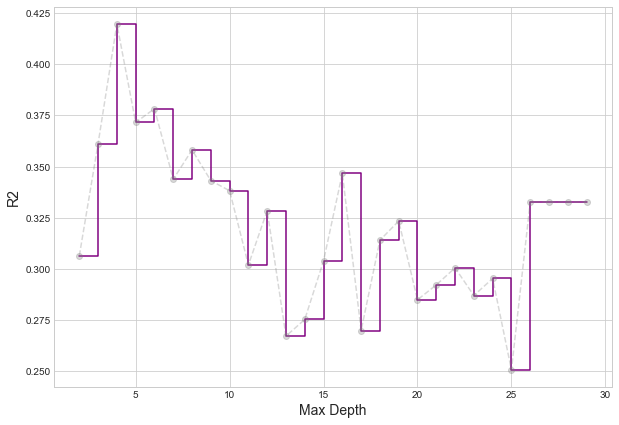

In [62]:
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
#plt.plot(depths, scores['Test Score'])
plt.step(depths, scores['Test Score'], where='post', color='purple')
plt.plot(depths, scores['Test Score'], 'o--', color='grey', alpha=0.3)
plt.xlabel('Max Depth')
plt.ylabel('R2')
plt.show()

In [63]:
#Decision Tree Model with optimal depth with PCA
opt_dec_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
#Create Pipeline
opt_dec_pipe = make_pipeline(dec_preprocessor, pca, opt_dec_tree)
#fit the model
opt_dec_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>)])),
                ('pca', PCA(n_components=0.95)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=4, random_state=42))])

In [64]:
%%time
#Predictions 
opt_dec_train_score = eval_regression(y_train, opt_dec_pipe.predict(X_train))
opt_dec_test_score = eval_regression(y_test, opt_dec_pipe.predict(X_test))
print('Regression Tree Training Results')
print(f'RMSE Score: {opt_dec_train_score[0]}')
print(f'R^2 Score: {opt_dec_train_score[1]}\n')

print('Regression Tree Testing Results')
print(f'RMSE Score:  {opt_dec_test_score[0]}')
print(f'R^2 Score: {opt_dec_test_score[1]}\n')

Regression Tree Training Results
RMSE Score: 0.10829826456486874
R^2 Score: 0.49168792136188233

Regression Tree Testing Results
RMSE Score:  0.11399108872532693
R^2 Score: 0.4197152906207132

CPU times: user 111 ms, sys: 13.2 ms, total: 124 ms
Wall time: 86.4 ms


In [65]:
#Keeping track of scores
scores_df.loc['OPT Reg Train'] = [opt_dec_train_score[0], opt_dec_train_score[1]]
scores_df.loc['OPT Reg Test'] = [opt_dec_test_score[0], opt_dec_test_score[1]]
scores_df

,RMSE,R^2
Reg Train,0.0,1.0
Reg Test,0.127464,0.274438
Reg PCA Train,0.0,1.0
Reg PCA Test,0.122236,0.332732
OPT Reg Train,0.108298,0.491688
OPT Reg Test,0.113991,0.419715


## Method 2 - Linear Regression

### Linear Regression - Default Model

In [66]:
#Pipelines for Linear Regreassion
lr_cat_pipe = make_pipeline(ohe, scaler)
lr_num_pipe = make_pipeline(scaler)

In [67]:
#Tuples
lr_num_tuple = (lr_num_pipe, num_selector)
lr_cat_tuple = (lr_cat_pipe, cat_selector)

In [68]:
lr_preprocessor = make_column_transformer(lr_cat_tuple, lr_num_tuple, remainder='passthrough')
lr_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>)])

In [69]:
#Instantiate Linear Regression Model
lr = LinearRegression()
#LR Pipeline
lr_pipe = make_pipeline(lr_preprocessor, lr)

In [70]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>)])),
                ('linearregression', LinearRegression())])

In [71]:
%%time
#predictions
lr_train_score = eval_regression(y_train, lr_pipe.predict(X_train))
lr_test_score = eval_regression(y_test, lr_pipe.predict(X_test))
print('Linear Regression Training Results')
print(f'RMSE Score: {lr_train_score[0]}')
print(f'R^2 Score: {lr_train_score[1]}\n')

print('Linear Regression Testing Results')
print(f'RMSE Score: {lr_test_score[0]}')
print(f'R^2 Score: {lr_test_score[1]}\n')


Linear Regression Training Results
RMSE Score: 0.10726314517639836
R^2 Score: 0.501358420565456

Linear Regression Testing Results
RMSE Score: 16700429514265.518
R^2 Score: -1.2455311841198355e+28

CPU times: user 74.9 ms, sys: 7.93 ms, total: 82.9 ms
Wall time: 44 ms


In [72]:
#keeping score
scores_df.loc['LR Train'] = [lr_train_score[0], lr_train_score[1]]
scores_df.loc['LR Test'] = [lr_test_score[0], lr_test_score[1]]
scores_df

,RMSE,R^2
Reg Train,0.0,1.0
Reg Test,0.127464,0.274438
Reg PCA Train,0.0,1.0
Reg PCA Test,0.122236,0.332732
OPT Reg Train,0.108298,0.491688
OPT Reg Test,0.113991,0.419715
LR Train,0.107263,0.501358
LR Test,16700429514265.517578,-12455311841198355443634667520.0


### Linear Regression - with PCA

In [73]:
#pca linear regression pipeline
pca_lr_pipe = make_pipeline(lr_preprocessor, pca, lr)

In [74]:
pca_lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>)])),
                ('pca', PCA(n_components=0.95)),
                ('linearregression', LinearRegression())])

In [75]:
%%time
#predictions
pca_lr_train_score = eval_regression(y_train, pca_lr_pipe.predict(X_train))
pca_lr_test_score = eval_regression(y_test, pca_lr_pipe.predict(X_test))
print('Linear Regression Training Results')
print(f'RMSE Score: {pca_lr_train_score[0]}')
print(f'R^2 Score: {pca_lr_train_score[1]}\n')

print('Linear Regression Testing Results')
print(f'RMSE Score: {pca_lr_test_score[0]}')
print(f'R^2 Score: {pca_lr_test_score[1]}\n')

Linear Regression Training Results
RMSE Score: 0.07570969361290898
R^2 Score: 0.751577794943132

Linear Regression Testing Results
RMSE Score: 0.10260781894033891
R^2 Score: 0.5298242389543628

CPU times: user 218 ms, sys: 16.2 ms, total: 234 ms
Wall time: 69.3 ms


In [76]:
#keeping score
scores_df.loc['LR PCA Train'] = [pca_lr_train_score[0], pca_lr_train_score[1]]
scores_df.loc['LR PCA Test'] = [pca_lr_test_score[0], pca_lr_test_score[1]]
scores_df

,RMSE,R^2
Reg Train,0.0,1.0
Reg Test,0.127464,0.274438
Reg PCA Train,0.0,1.0
Reg PCA Test,0.122236,0.332732
OPT Reg Train,0.108298,0.491688
OPT Reg Test,0.113991,0.419715
LR Train,0.107263,0.501358
LR Test,16700429514265.517578,-12455311841198355443634667520.0
LR PCA Train,0.07571,0.751578
LR PCA Test,0.102608,0.529824


## Feature Engineering 1
Method - Dropping 'wine' to see if it will help the model from overfitting on the training data, because it has the largest unique categorical values.

In [77]:
#DF copy
df2 = df_ml.copy()
df2.head()

,winery,wine,vintage,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [78]:
print(df2.apply(lambda col: col.nunique()))

winery          395
wine            677
vintage          70
rating            8
num_reviews     730
region           63
price          1153
type             21
body              4
acidity           3
dtype: int64


### Preprocessing

In [79]:
#dropping wine
df2.drop(columns='wine', inplace=True)
df2.head()

,winery,vintage,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [80]:
#Features Matrix and Target
X = df2.drop(columns='rating')
y = df2['rating']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Method 3 - Ridge Regression

###  Hypertune by using GridsearchCV

In [81]:
#Instantiate Ridge
ridge = Ridge()
#Create ridge pipeline
ridge_pipe = make_pipeline(lr_preprocessor, pca, ridge)

In [82]:
#Fit pipeline
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>)])),
                ('pca', PCA(n_components=0.95)), ('ridge', Ridge())])

In [83]:
#Create params for GridSearchCV
grid_params = {"ridge__max_iter": [1000],
                      'ridge__alpha': range(10,1000,100),
                       'ridge__fit_intercept': [True, False]}

In [84]:
#Instantiate GridSearchCV
ridge_grid = GridSearchCV(ridge_pipe, grid_params)

In [85]:
%%time
#Fit GridSearchCV
ridge_grid.fit(X_train, y_train)

CPU times: user 21.3 s, sys: 691 ms, total: 22 s
Wall time: 6.39 s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>)])),
                                       ('pca', PCA(n_components=0.95)),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': range(10, 1000, 100),
                         'ridge__fit_intercept': [True, False],
                         'ridge__max_iter': [1000]})

In [86]:
#Determine best params
ridge_grid.best_params_

{'ridge__alpha': 510, 'ridge__fit_intercept': True, 'ridge__max_iter': 1000}

In [87]:
#Instantiate Ridge with previous best max iter and intercept
ridge = Ridge(max_iter=1000, fit_intercept=True)
#Hypertuning alpha within 510 range
grid_params = {'ridge__alpha': [480,490,500,510,520,530,540,550]}
#Update ridge pipeline
ridge_pipe = make_pipeline(lr_preprocessor, pca, ridge)

In [88]:
#Instantiate GridSearchCV
ridge_grid = GridSearchCV(ridge_pipe, grid_params)

In [89]:
%%time
#Fit GridSearchCV
ridge_grid.fit(X_train, y_train)

CPU times: user 8.66 s, sys: 244 ms, total: 8.91 s
Wall time: 2.34 s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>)])),
                                       ('pca', PCA(n_components=0.95)),
                                       ('ridge', Ridge(max_iter=1000))]),
             param_grid={'ridge__alpha': [480, 490, 500, 510, 520, 530, 540,
                                          550]})

In [90]:
#Determine best params
ridge_grid.best_params_

{'ridge__alpha': 520}

In [91]:
#Ridge model with updated optimal params
ridge = Ridge(alpha=520, fit_intercept=True, max_iter=1000)
#Create ridge pipeline
ridge_pipe = make_pipeline(lr_preprocessor, pca, ridge)

In [92]:
#Fit pipeline
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>)])),
                ('pca', PCA(n_components=0.95)),
                ('ridge', Ridge(alpha=520, max_iter=1000))])

In [93]:
%%time
#predictions 
ridge_train_score = eval_regression(y_train, ridge_pipe.predict(X_train))
ridge_test_score = eval_regression(y_test, ridge_pipe.predict(X_test))
print('Ridge with Optimal Params')
print(f'RMSE Training Score: {ridge_train_score[0]}')
print(f'R^2 Training Score: {ridge_train_score[1]}\n')

print(f'RMSE Testing Score: {ridge_test_score[0]}')
print(f'R^2 Testing Score: {ridge_test_score[1]}\n')

Ridge with Optimal Params
RMSE Training Score: 0.10370326872219524
R^2 Training Score: 0.5441104881530849

RMSE Testing Score: 0.12253758080052325
R^2 Testing Score: 0.2804276521419836

CPU times: user 114 ms, sys: 9.72 ms, total: 124 ms
Wall time: 37 ms


In [94]:
#keeping score
scores_df.loc['Ridge Train'] = [ridge_train_score[0], ridge_train_score[1]]
scores_df.loc['Ridge Test'] = [ridge_test_score[0], ridge_test_score[1]]
scores_df

,RMSE,R^2
Reg Train,0.0,1.0
Reg Test,0.127464,0.274438
Reg PCA Train,0.0,1.0
Reg PCA Test,0.122236,0.332732
OPT Reg Train,0.108298,0.491688
OPT Reg Test,0.113991,0.419715
LR Train,0.107263,0.501358
LR Test,16700429514265.517578,-12455311841198355443634667520.0
LR PCA Train,0.07571,0.751578
LR PCA Test,0.102608,0.529824


## Feature Engineering 2
Combining body and acidity for a larger range, then dropping the original redundant columns. ML models will work with a new df that has greater than or equal to 13 points of data in winery. This should help to minimize the amount of single unique values

In [114]:
#Create copy of ml data
df3 = df_ml.copy()
df3.head()

,winery,wine,vintage,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [115]:
#Combining body and acidity
df3['body_acidity'] = df3['body'] + df3['acidity']
#Dropping redundant columns
df3.drop(columns=['body', 'acidity'], inplace=True)
df3.head()

,winery,wine,vintage,rating,num_reviews,region,price,type,body_acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,8.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,6.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,8.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,8.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,8.0


In [97]:
df4 = df3[df3['winery'].map(df3['winery'].value_counts()) >= 13] 
df4

,winery,wine,vintage,rating,num_reviews,region,price,type,body_acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,8.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,6.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,8.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,8.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,8.0
...,...,...,...,...,...,...,...,...,...
2028,Sierra Cantabria,Coleccion Privada,2012,4.2,420,Rioja,28.30,Rioja Red,7.0
2032,La Rioja Alta,Vina Alberdi Crianza,2018,4.2,410,Rioja,13.58,Rioja Red,7.0
2042,Artadi,Valdegines,2016,4.2,398,Vino de Espana,48.96,Tempranillo,6.0
2043,Contino,Rioja Graciano,2011,4.2,395,Rioja,61.94,Rioja Red,7.0


In [98]:
# Matrix features and target
X = df4.drop(columns='rating')
y = df4['rating']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Method 4 - Linear Regression with PCA

In [99]:
#create lr pipeline
lr2_pca_pipe = make_pipeline( lr_preprocessor, pca, lr)

In [100]:
#fit feature engineering method 2 linear regression pipeline
lr2_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>)])),
                ('pca', PCA(n_components=0.95)),
                ('linearregression', LinearRegression())])

In [101]:
%%time
#predictions
lr2_train_score = eval_regression(y_train, lr2_pca_pipe.predict(X_train))
lr2_test_score = eval_regression(y_test, lr2_pca_pipe.predict(X_test))
print('Feature Engineering Training Results')
print(f'RMSE Score: {lr2_train_score[0]}')
print(f'R^2 Score: {lr2_train_score[1]}\n')

print(f'RMSE Score: {lr2_test_score[0]}')
print(f'R^2 Score: {lr2_test_score[1]}\n')

Feature Engineering Training Results
RMSE Score: 0.09021207594698888
R^2 Score: 0.7286649089231365

RMSE Score: 0.10160987760960405
R^2 Score: 0.6397458653059985

CPU times: user 53.4 ms, sys: 4.31 ms, total: 57.7 ms
Wall time: 16.9 ms


In [102]:
#keeping score
scores_df.loc['LR 2 Train'] = [lr2_train_score[0], lr2_train_score[1]]
scores_df.loc['LR 2 Test'] = [lr2_test_score[0], lr2_test_score[1]]
scores_df

,RMSE,R^2
Reg Train,0.0,1.0
Reg Test,0.127464,0.274438
Reg PCA Train,0.0,1.0
Reg PCA Test,0.122236,0.332732
OPT Reg Train,0.108298,0.491688
OPT Reg Test,0.113991,0.419715
LR Train,0.107263,0.501358
LR Test,16700429514265.517578,-12455311841198355443634667520.0
LR PCA Train,0.07571,0.751578
LR PCA Test,0.102608,0.529824


## Method 5 - Linear Regression with PCA
Dropping all columns with large unique values

In [103]:
df5 = df_ml.copy()
df5.head()

,winery,wine,vintage,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [104]:
print(df5.apply(lambda col: col.nunique()))

winery          395
wine            677
vintage          70
rating            8
num_reviews     730
region           63
price          1153
type             21
body              4
acidity           3
dtype: int64


In [105]:
df5 = df5.drop(columns=['winery', 'wine', 'num_reviews','price'])
df5.head()

,vintage,rating,region,type,body,acidity
0,2013,4.9,Toro,Toro Red,5.0,3.0
1,2018,4.9,Vino de Espana,Tempranillo,4.0,2.0
2,2009,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
3,1999,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
4,1996,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,3.0


In [106]:
# Matrix features and target
X = df5.drop(columns='rating')
y = df5['rating']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [107]:
#create lr pipeline
lr3_pca_pipe = make_pipeline(lr_preprocessor, pca, lr)

In [108]:
#fit feature engineering method 2 linear regression pipeline
lr3_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63520>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7faff4c63340>)])),
                ('pca', PCA(n_components=0.95)),
                ('linearregression', LinearRegression())])

In [109]:
%%time
#predictions
lr3_train_score = eval_regression(y_train, lr3_pca_pipe.predict(X_train))
lr3_test_score = eval_regression(y_test, lr3_pca_pipe.predict(X_test))
print('Feature Engineering Training Results')
print(f'RMSE Score: {lr3_train_score[0]}')
print(f'R^2 Score: {lr3_train_score[1]}\n')

print(f'RMSE Score: {lr3_test_score[0]}')
print(f'R^2 Score: {lr3_test_score[1]}\n')

Feature Engineering Training Results
RMSE Score: 0.14194058784925392
R^2 Score: 0.1459409304856727

RMSE Score: 0.13977464939059175
R^2 Score: 0.06374815886974117

CPU times: user 52.3 ms, sys: 3.11 ms, total: 55.4 ms
Wall time: 14.4 ms


### Metrics for all training and testing models

In [110]:
#keeping score
scores_df.loc['LR 3 Train'] = [lr3_train_score[0], lr3_train_score[1]]
scores_df.loc['LR 3 Test'] = [lr3_test_score[0], lr3_test_score[1]]
scores_df

,RMSE,R^2
Reg Train,0.0,1.0
Reg Test,0.127464,0.274438
Reg PCA Train,0.0,1.0
Reg PCA Test,0.122236,0.332732
OPT Reg Train,0.108298,0.491688
OPT Reg Test,0.113991,0.419715
LR Train,0.107263,0.501358
LR Test,16700429514265.517578,-12455311841198355443634667520.0
LR PCA Train,0.07571,0.751578
LR PCA Test,0.102608,0.529824


In [111]:
scores_df.reset_index(inplace=True)

### Only testing scores sorted by highest to lowest

In [113]:
scores_df[scores_df['index'].str.contains('Test')].sort_values('R^2', ascending=False)

,index,RMSE,R^2
13,LR 2 Test,0.10161,0.639746
9,LR PCA Test,0.102608,0.529824
5,OPT Reg Test,0.113991,0.419715
3,Reg PCA Test,0.122236,0.332732
11,Ridge Test,0.122538,0.280428
1,Reg Test,0.127464,0.274438
15,LR 3 Test,0.139775,0.063748
7,LR Test,16700429514265.517578,-12455311841198355443634667520.0


## Summary
<b>Model Recommendation:</b> Linear Regression 2 Model

How was the model built?
- Model used PCA with n_components set to .95
- Feature Engineering combining 2 features into a new column
- Filtered categorical column with the most unique values and only keeping rows that had >= 13 data points
- Pipeline for OneHot Encoding Categorical data and Standard Scaler on all data
- Did not impute any missing data

According to our test results the Linear Regression 2 Model had the lower RMSE scores without being overfit to the data. The two models with the best R^2 also had training data that was close in range. I think this is a good indicator that both models were well fitted to the training and the testing data. <br>

#### Additional Exploration
Due to the magnitude of unique categorical values in multiple columns, the first Linear Regression model was increidbly overfit on the training data. Because of this, PCA was able to tremedously improve the model on the testing data by colossal amount. Twelve octillion to be exact. <br>

<b>Additional methods to combat large unique categorical values:</b>
>
>- <b>Ridge Model:</b> Dropping the largest categorical column
    - Result: Performance was on par with default Regression Tree Model
>- <b>Linear Regression 3:</b> Dropping all columns with large unique values
    - Result: Performed the worst, with the exception of the hugely underfit default Linear Regression Model

<b> In summary:</b>
<br>I think this dataset is a good example of collecting too much and not enough data at the same time. Moving onward I would recommend we speak to the client to determine their goals along with how flexible their priorities are. Then communicate with a domain expert to nail down what other data could be gathered to further improve the model. Their expertise would help aid data scientist in properly identifying the target, filtering/data cleaning, feature selection and even picking machine learning models. 

